In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [4]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized().data[:1000]
n_samples, n_features = data.shape
print 'Random projections for %d samples in %d dimensions' %(n_samples,n_features)

Random projections for 1000 samples in 130107 dimensions


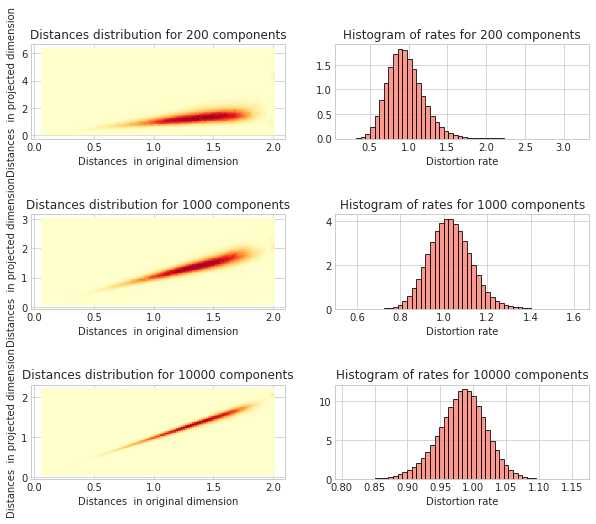

In [16]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import euclidean_distances

n_components_range = np.array([200,1000,10000])
dists = euclidean_distances(data, squared=True).ravel()
nonzero = dists!=0
dists = dists[nonzero]

with plt.style.context('seaborn-whitegrid'):
    fig1 = plt.figure(figsize=(10,8))
    gs = gridspec.GridSpec(len(n_components_range), 2)
    gs.update(hspace=0.8)
    ax = [] #to store figure handles of each subplot
    
    row = 0
    for n_components in n_components_range:
        rp = SparseRandomProjection(n_components=n_components)
        projected_data = rp.fit_transform(data)
        projected_dists = euclidean_distances(projected_data,squared=True).ravel()[nonzero]
        
        ax.append(fig1.add_subplot(gs[row,0]))
        ax[-1].hexbin(dists, projected_dists, gridsize=100, cmap=plt.cm.YlOrRd)
        plt.xlabel('Distances  in original dimension')
        plt.ylabel('Distances  in projected dimension')
        plt.title('Distances distribution for %d components' %n_components)
        
        rates = projected_dists/dists
        ax.append(fig1.add_subplot(gs[row,1]))
        plt.hist(rates, bins=50, normed=True, edgecolor='k', facecolor='salmon', alpha=0.8)
        plt.xlabel('Distortion rate')
        plt.title('Histogram of rates for %d components' %n_components)
        
        row+=1

#### As number of components increases, distortion decreases.

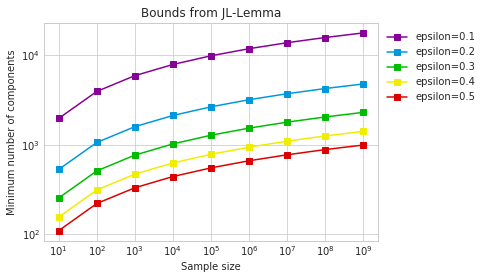

In [21]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
eps_range = np.linspace(0.1,0.5, 5)
n_samples_range = np.logspace(1,9,9)
colors=plt.cm.nipy_spectral(np.linspace(0.1, 0.9, len(eps_range))) #chooses 9 colors

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for eps, color in zip(eps_range, colors):
        min_n_components = johnson_lindenstrauss_min_dim(n_samples_range, eps=eps)
        plt.loglog(n_samples_range, min_n_components, marker='s', color=color)
    plt.legend(['epsilon=%0.1f' %eps for eps in eps_range], bbox_to_anchor=(1,1))
    plt.xlabel('Sample size')
    plt.ylabel('Minimum number of components')
    plt.title('Bounds from JL-Lemma')


#### From the plot above, it is seen that for a small sample size, even with minimum 0,1 distortion, the minimum number of components needed is >1000. So random projections are more useful for big data rather than small data.